<a href="https://colab.research.google.com/github/syedmahmoodiagents/Speech/blob/main/SpeechTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras --q

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from glob import glob
import cv2
from sklearn.utils import shuffle
import itertools


In [ ]:
pwd()

'/content'

In [ ]:
import os
import zipfile

# READ IN AUDIO FILES
audio = "/content/sravdess-emotional-speech-audio.zip"

# Open the zip file
with zipfile.ZipFile(audio, 'r') as zip_ref:
    # Extract all the contents to a temporary directory
    zip_ref.extractall('sravdess-emotional-speech-audio/')

In [ ]:
folders = os.listdir('sravdess-emotional-speech-audio/sravdess-emotional-speech-audio/')
print(folders)

['Actor_02', 'Actor_01']


In [ ]:
os.chdir('sravdess-emotional-speech-audio/')

In [ ]:
# Set the path to the extracted folder
# path_main = '/content/extracted_audio'
path_main = 'sravdess-emotional-speech-audio/'


# List all folders in the extracted directory
folders_main = os.listdir(path_main)

print(folders_main)

['Actor_02', 'Actor_01']


In [ ]:
folders_main = [i for i in folders_main if i not in ('.ipynb_checkpoints' , '.DS_Store')]

In [ ]:
print(folders_main)

['Actor_02', 'Actor_01']


In [ ]:
len(folders_main)

2

In [ ]:
images = "sample_data/logmel/"

dicts = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

root_path = 'sample_data/logmel/'

# Check if the root directory exists, if not, create it
if not os.path.exists(root_path):
    os.makedirs(root_path)

folders = dicts.values()
for folder in folders:
    os.mkdir(os.path.join(root_path, folder))

In [ ]:
path_main

'sravdess-emotional-speech-audio/'

In [ ]:
fname = os.path.join(path_main, 'Actor_01', '03-01-04-02-02-02-01.wav')
fname

'sravdess-emotional-speech-audio/Actor_01/03-01-04-02-02-02-01.wav'

In [ ]:
# Check if the file exists
if os.path.exists(fname):
    # Load the audio file
    y, sr = librosa.load(fname)
    yt, _ = librosa.effects.trim(y)
    print("Audio file loaded and trimmed successfully.")
else:
    print(f"File not found: {fname}")

Audio file loaded and trimmed successfully.


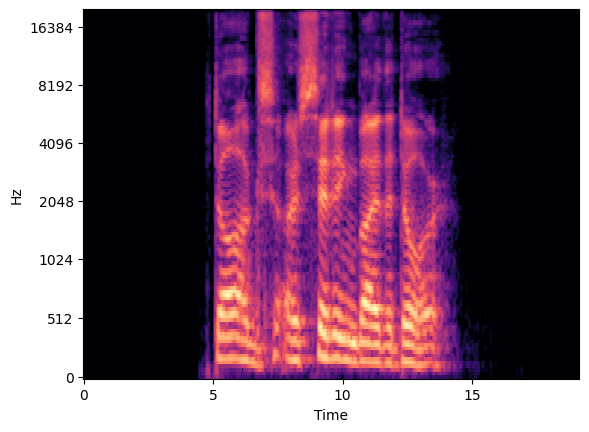

In [ ]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');


In [ ]:
counter = 0
import re
for folder in folders_main:
    path_in = os.path.join(path_main, folder)

    # List files in the current folder
    files_sub = os.listdir(path_in)
    for file in files_sub:
        numbers = re.findall('\d+', file)


        if len(numbers) > 2 and numbers[2] in dicts:
            emotion = dicts[numbers[2]]
        else:
            print(f"Skipping file {file} due to invalid emotion code.")
            continue

        print(f"Processing file: {file}, Emotion: {emotion}")

        # Construct paths for saving and loading
        path_save = os.path.join(images, f'{emotion}/{file}.jpeg')
        path_load = os.path.join(path_in, file)

        # Ensure the folder for the emotion exists
        if not os.path.exists(os.path.dirname(path_save)):
            os.makedirs(os.path.dirname(path_save))

        try:
            # Load the audio file
            y, sr = librosa.load(path_load)
            yt, _ = librosa.effects.trim(y)
            y = yt

            # Create the mel spectrogram
            mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
            db_spec = librosa.power_to_db(mel_spect)
            # print("mel created for :", path_save)

            # save the spectrogram
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(db_spec, y_axis='mel', fmax=8000, x_axis='time')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Mel spectrogram for {file}')
            plt.tight_layout()
            plt.savefig(path_save)
            # plt.show()
            plt.close()
            counter += 1

        except Exception as e:
            print(f"Error processing file {file}: {e}")

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1544253119.py:9: SyntaxWarning: invalid escape sequence '\d'
  numbers = re.findall('\d+', file)


Processing file: 03-01-06-02-02-02-02.wav, Emotion: fearful
Processing file: 03-01-07-02-02-02-02.wav, Emotion: disgust
Processing file: 03-01-07-01-01-01-02.wav, Emotion: disgust
Processing file: 03-01-05-01-02-02-02.wav, Emotion: angry
Processing file: 03-01-06-01-02-02-02.wav, Emotion: fearful
Processing file: 03-01-08-02-01-01-02.wav, Emotion: surprised
Processing file: 03-01-07-02-02-01-02.wav, Emotion: disgust
Processing file: 03-01-05-02-02-02-02.wav, Emotion: angry
Processing file: 03-01-01-01-02-01-02.wav, Emotion: neutral
Processing file: 03-01-03-02-02-01-02.wav, Emotion: happy
Processing file: 03-01-05-02-01-01-02.wav, Emotion: angry
Processing file: 03-01-02-01-01-02-02.wav, Emotion: calm
Processing file: 03-01-04-02-02-01-02.wav, Emotion: sad
Processing file: 03-01-08-01-02-01-02.wav, Emotion: surprised
Processing file: 03-01-01-01-01-01-02.wav, Emotion: neutral
Processing file: 03-01-08-02-01-02-02.wav, Emotion: surprised
Processing file: 03-01-07-01-02-01-02.wav, Emotio

In [ ]:
print(f"Processed {counter} files successfully.")

Processed 120 files successfully.


## Transfer Learning

In [ ]:
import os

In [ ]:
# os.makedirs('/content/logmel/angry')

In [ ]:
import glob


angry = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//angry/*.*')
calm = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//calm/*.*')
disgust = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//disgust/*.*')
fearful = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//fearful/*.*')
happy = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//happy/*.*')
neutral = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//neutral/*.*')
sad = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//sad/*.*')
surprised = glob.glob('/content/sravdess-emotional-speech-audio/sample_data/logmel//surprised/*.*')

In [ ]:
pwd()

'/content/sravdess-emotional-speech-audio'

In [ ]:
fm = os.listdir('/content/sravdess-emotional-speech-audio/sample_data/logmel')
fm = [f for f in fm if f not in ('.ipynb_checkpoints')]
fm

['disgust', 'angry', 'calm', 'neutral', 'happy', 'sad', 'fearful', 'surprised']

In [ ]:
# Get Count of files in each emotion
for em in fm:
    exec(f"length = len({em})")
    print(f"{em}\t\t: ", length)

disgust		:  16
angry		:  16
calm		:  16
neutral		:  8
happy		:  16
sad		:  16
fearful		:  16
surprised		:  16


In [ ]:
data = []
labels = []

for i in angry:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Angry')

for i in calm:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Calm')

for i in disgust:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Disgust')

for i in fearful:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Fearful')

for i in happy:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Happy')

for i in neutral:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Neutral')

for i in sad:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Sad')

for i in surprised:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb',
    target_size= (224,224))
    image=np.array(image)
    data.append(image)
    labels.append('Surprised')


data = np.array(data)
labels = np.array(labels)

In [ ]:
len(data)

120

In [ ]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0

    for labels in os.listdir(directory):
        if labels == 'angry':
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'

        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(75,75)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            # image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}

    return labels[class_code]

In [ ]:
Images, Labels = get_images('/content/sravdess-emotional-speech-audio/sample_data/logmel/') #Extract the training images from the folders.


In [ ]:
len(Images)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)

In [ ]:
lb = LabelEncoder()

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# y_val=np_utils.to_categorical(lb.fit_transform(y_val))
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
from tensorflow.keras import applications
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (75, 75, 3),pooling='avg')

input_shape=(75, 75, 3): specify the preferred shape of the images in our dataset

### Freeze the convolution blocks

In [ ]:
for layer in model.layers[:17]:
  layer.trainable = False

#Adding custom Layers

x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)

In [ ]:
predictions = Dense(8, activation="softmax")(x)

# creating the final model
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [ ]:
model_final.summary()

In [ ]:
history = model_final.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model_final.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1) # classes
Y_true = np.argmax(y_test,axis=1)

In [ ]:
categories = { int(i)-1 : dicts[i] for i in dicts.keys()}

In [ ]:
category_names = categories.values()
category_names

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
categories

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(Y_true, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

### Generating Augmented Images

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( zoom_range=0.3, rotation_range=20,
                                   width_shift_range=0.15)

#### example:

In [ ]:
img_id = 3
img_generator = train_datagen.flow(X_train[img_id:img_id+1], y_train[img_id:img_id+1],
                                   batch_size=1)

In [ ]:
angry_img = [next(img_generator) for i in range(0,5)]

In [ ]:

fig, ax = plt.subplots(1,5, figsize=(15, 6))
i = 0
for item in angry_img:
    ax[i].imshow(item[0][0])
    i = i+1
plt.show()

#### genertaing for train data

In [ ]:
train_generator = train_datagen.flow(X_train,y_train,batch_size=1)

#### model

In [ ]:
augmen_model = applications.VGG16(weights = "imagenet", include_top=False,
                                  input_shape = (75, 75, 3),pooling='avg')

#### Freezing Layers

In [ ]:
for layer in augmen_model.layers[:17]:
    layer.trainable = False

#Adding custom Layers

x = augmen_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)

In [ ]:
predictions = Dense(8, activation="softmax")(x)

In [ ]:
# creating the final model
aug_model_final = Model(inputs = augmen_model.input, outputs = predictions)

In [ ]:
# compile the model
aug_model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [ ]:
aug_model_final.summary()

In [ ]:
history = aug_model_final.fit(train_generator,validation_data=(X_test,y_test),epochs=100, shuffle=True)

In [ ]:
history.history

In [ ]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred = aug_model_final.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1) # classes
Y_true = np.argmax(y_test,axis=1)

In [ ]:
Y_pred.shape

In [ ]:
accuracy = accuracy_score(Y_true, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))